In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('sales_data.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [3]:
#outlier detection
#correlation analysis
#normalisation and standardisation
#pca

In [4]:
numeric_df = df[["Revenue","Cost"]]
numeric_df

,Revenue,Cost
0,950,360
1,950,360
2,2401,1035
3,2088,900
4,418,180
...,...,...
113031,184,72
113032,1183,528
113033,1183,528
113034,1260,576


Revenue   14765
Cost   18179


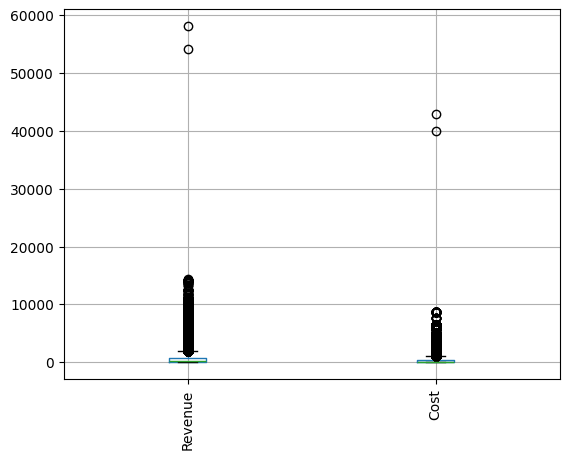

In [5]:
outlier = {} # ok so dict define keli so that we can keep track of all the outliers accoridng to the columns

#iterating over columns in dataframe
for col in numeric_df:
    #calculating the values needed to make a valid range
    #=========================================================
    q1 = numeric_df[col].quantile(0.25)
    q3 = numeric_df[col].quantile(0.75)
    iqr = q3 - q1
    #=========================================================
    #now getting all the values such they; they lie outside the valid range
    val = numeric_df[col][(numeric_df[col] < q1 - 1.5*iqr) | (numeric_df[col] > q3 + 1.5*iqr)]
    #storing the values in the outlier  dictionary
    outlier[col] = val
#printing the dictinary according to the columns
for col in outlier:
    print(col, " ", len(outlier[col]))

#making the box plot
numeric_df.boxplot(rot=90)
plt.show()

In [6]:
#removing the outliers to make the data cleaner
cleaned_numeric_df = numeric_df.copy()
mask = pd.Series([True]*numeric_df.shape[0])
print(mask)
#iterating over columns in dataframe
for col in numeric_df:
    #calculating the values needed to make a valid range
    #=========================================================
    q1 = numeric_df[col].quantile(0.25)
    q3 = numeric_df[col].quantile(0.75)
    iqr = q3 - q1
    #=========================================================
    #storing only values such that they belong in the valid range
    col_mask = ( numeric_df[col] >= q1 - 1.5*iqr ) & ( numeric_df[col] <= q3 + 1.5*iqr)
    mask = mask & col_mask

#now the data is free from outliers
cleaned_numeric_df = numeric_df[mask]
cleaned_numeric_df

0         True
1         True
2         True
3         True
4         True
          ... 
113031    True
113032    True
113033    True
113034    True
113035    True
Length: 113036, dtype: bool


,Revenue,Cost
0,950,360
1,950,360
4,418,180
5,522,225
6,379,180
...,...,...
113031,184,72
113032,1183,528
113033,1183,528
113034,1260,576


In [7]:
#now calculating the spearman correlation
spearman_corr = cleaned_numeric_df.corr(method="spearman")
print(spearman_corr)
# ^ is the spearman correlation
pearson_corr = cleaned_numeric_df.corr(method="pearson")
print(pearson_corr)
# ^ is the pearson correlation

          Revenue      Cost
Revenue  1.000000  0.981725
Cost     0.981725  1.000000
          Revenue      Cost
Revenue  1.000000  0.924473
Cost     0.924473  1.000000


In [8]:
# okay so now what did we do unitll now?
# 1. loaded the data from csv
# 2. cleaned the data per col by looking whether that element is within the range or not
# 3. now this corr matirx

# more on corr :
    

In [9]:
#now normaizating the data
#okay so minMaxScaler cha object banavla
mm = MinMaxScaler()
#mag using this objet we normalized this
normalized_cleaned_numeric = mm.fit_transform(cleaned_numeric_df)
#so it returns a numpy array and we have to convert it into df so that we can save it later into a csv
print(type(normalized_cleaned_numeric))

#now convert it into a data frame
normalized_cleaned_numeric_df = pd.DataFrame(normalized_cleaned_numeric,columns=cleaned_numeric_df.columns)

normalized_cleaned_numeric_df


<class 'numpy.ndarray'>


,Revenue,Cost
0,0.498161,0.348206
1,0.498161,0.348206
2,0.218602,0.173618
3,0.273253,0.217265
4,0.198108,0.173618
...,...,...
94706,0.095638,0.068865
94707,0.620599,0.511154
94708,0.620599,0.511154
94709,0.661061,0.557711


In [10]:
#now standardizing the data
#making an object
sc = StandardScaler()
#so now taking the std scaler and applying it on the cleaned data to get std data
std_cleaned_numeric = sc.fit_transform(cleaned_numeric_df)

#now taking this numpy array and converting it into a pandas data frame
std_cleaned_numeric_df = pd.DataFrame(std_cleaned_numeric,columns=cleaned_numeric_df.columns)
std_cleaned_numeric_df

,Revenue,Cost
0,1.865930,0.936122
1,1.865930,0.936122
2,0.325538,0.081087
3,0.626667,0.294846
4,0.212614,0.081087
...,...,...
94706,-0.352003,-0.431934
94707,2.540576,1.734155
94708,2.540576,1.734155
94709,2.763527,1.962165


In [11]:
#now moving onto the PCA part 
#calculating the covariance matrix
cov_mat = np.cov(cleaned_numeric_df.T)
#so apparently aplyala hya transpose karun pathavai la lagta
#if not kahi trai problem yetoi
print("Covariance Matrix : \n",cov_mat)

#now off to the eigen values
eigen_vals,eigen_vect = np.linalg.eig(cov_mat)
print("Eigen Values : \n",eigen_vals)
print("Eigen Vectors : \n",eigen_vect)

Covariance Matrix : 
 [[119279.3452073   67215.22325481]
 [ 67215.22325481  44318.14953264]]
Eigen Values : 
 [158757.70689671   4839.78784324]
Eigen Vectors : 
 [[ 0.86227043 -0.50644813]
 [ 0.50644813  0.86227043]]


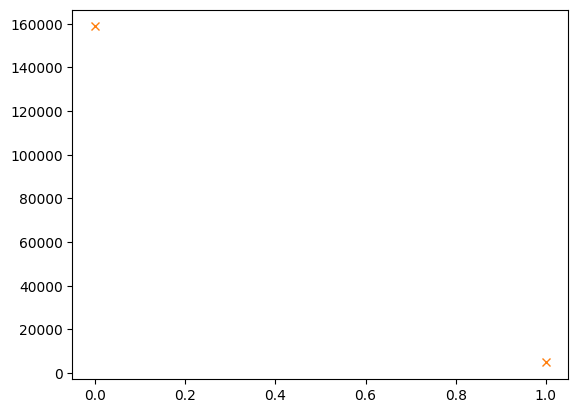

In [17]:
plt.plot(sorted(eigen_vals,reverse=True),marker='x',linestyle='')
plt.show()

In [21]:
pca = PCA()
pca_numeric_cleaned = pca.fit_transform(cleaned_numeric_df)

pca_numeric_cleaned_df = pd.DataFrame(pca_numeric_cleaned,columns=cleaned_numeric_df.columns)
pca_numeric_cleaned_df

,Revenue,Cost
0,655.478736,-156.442453
1,655.478736,-156.442453
2,105.590204,-42.220727
3,218.056494,-56.089162
4,71.961657,-22.469250
...,...,...
94706,-150.877474,-16.837071
94707,941.471031,-129.583434
94708,941.471031,-129.583434
94709,1032.175364,-127.190959


In [22]:

pca.explained_variance_

array([158757.70689671,   4839.78784324])